In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

 1- Initialisation Of Code:

Purpose:Imports necessary libraries.

 2- Loading Dataframe:
 
Purpose: loads the food_security_database.csv into a DataFrame.

In [64]:
df = pd.read_csv("food_security_database.csv", encoding='windows-1252')

3- Data Analysis: for example how many columns and rows are there in dataframe and which are those. 

In [32]:
df

,Region_ID,Date,Avg_Temperature_C,Rainfall_mm,Drought_Index,Flood_Occurrence,Crop_Yield_Hectare,Market_Price_Staple_Food,Household_Income_USD,Conflict_Index,Displacement_Count,Food_Insecurity_Score,Food_Insecurity_Status
0,R001,15-01-2023,25.5,120.5,0.2,0,3.2,150,850,0.1,10,2.1,Low
1,R002,15-01-2023,28.1,90.2,0.5,0,2.8,180,780,0.2,25,3.5,Moderate
2,R003,15-01-2023,22.0,150.0,0.1,0,3.5,140,920,0.0,5,1.8,Low
3,R004,15-01-2023,30.2,50.1,0.8,0,2.0,220,650,0.3,50,6.2,High
4,R005,15-01-2023,26.8,110.3,0.3,0,3.0,165,800,0.1,15,2.9,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,R096,15-09-2023,31.0,45.0,1.0,0,1.8,230,600,0.5,90,7.0,Severe
96,R097,15-09-2023,24.0,135.0,0.1,0,3.6,135,900,0.0,10,2.1,Low
97,R098,15-09-2023,29.5,65.0,0.7,0,2.4,195,700,0.3,50,5.5,High
98,R099,15-09-2023,23.0,140.0,0.0,0,3.7,130,920,0.0,8,1.9,Low


4- Data Preparation for Visualization and Categorical Conversion

Purpose:

This section of the code serves two primary purposes in preparing the dataset for effective visualization and analysis:

In [83]:
# Visualization 
df['Food_Insecurity_Status'] = pd.Categorical(df['Food_Insecurity_Status'])

 #Select features to plot
features_to_plot = ['Drought_Index', 'Conflict_Index', 'Displacement_Count',
                    'Crop_Yield_Hectare', 'Household_Income_USD']



Purpose:

Assigns numerical weights to different attributes based on their assumed impact on food insecurity. Higher weights indicate a stronger influence. This step is crucial for incorporating expert knowledge or domain understanding into the analysis.

In [66]:
# Higher weights mean greater impact on food insecurity.
# Negative weights for attributes that improve food security (e.g., higher income means lower insecurity).

attribute_weights = {
    'Avg_Temperature_C': 0.10,
    'Rainfall_mm': 0.10,
    'Drought_Index': 0.20,
    'Flood_Occurrence': 0.05,
    'Crop_Yield_Hectare': -0.20, # Higher yield implies less insecurity
    'Market_Price_Staple_Food': 0.20,
    'Household_Income_USD': -0.20, # Higher income implies less insecurity
    'Conflict_Index': 0.20,
    'Displacement_Count': 0.20
}

6- Normalize Numerical Features

Purpose: Before applying weights, it's essential to normalize numerical features. Normalization scales all values to a common range (e.g., 0 to 1), preventing attributes with larger numerical ranges.

In [67]:

numerical_cols = list(attribute_weights.keys())

# Apply Min-Max Normalization
for col in numerical_cols:
    min_val = df[col].min()
    max_val = df[col].max()
# Handle cases where min_val and max_val are the same to avoid division by zero
    if (max_val - min_val) != 0:
        df[f'{col}_Normalized'] = (df[col] - min_val) / (max_val - min_val)
    else:
        df[f'{col}_Normalized'] = 0 # If all values are the same, normalized value is 0



7- Calculate Weighted Food Insecurity Risk Score:

Purpose: 

Computes a composite "Weighted Food Insecurity Risk Score" by multiplying each normalized feature, by its corresponding weight and summing these.

A higher weighted score indicates higher food insecurity risk.

In [71]:
# Calculate Weighted Food Insecurity Risk Score
df['Weighted_Insecurity_Score'] = 0
for col, weight in attribute_weights.items():
    normalized_col_name = f'{col}_Normalized'
    if normalized_col_name in df.columns:
        df['Weighted_Insecurity_Score'] += df[normalized_col_name] * weight



In [72]:
# Wecan re-scale the final weighted score if needed, e.g., to a 0-10 scale
min_weighted = df['Weighted_Insecurity_Score'].min()
max_weighted = df['Weighted_Insecurity_Score'].max()
if (max_weighted - min_weighted) != 0:
    df['Weighted_Insecurity_Score_Scaled'] = (df['Weighted_Insecurity_Score'] - min_weighted) / (max_weighted - min_weighted) * 10
else:
    df['Weighted_Insecurity_Score_Scaled'] = 0

print("DataFrame with Normalized Features and Weighted Insecurity Score:")
df[['Region_ID', 'Food_Insecurity_Score', 'Weighted_Insecurity_Score_Scaled'] + [f'{col}_Normalized' for col in numerical_cols]].head()


DataFrame with Normalized Features and Weighted Insecurity Score:


,Region_ID,Food_Insecurity_Score,Weighted_Insecurity_Score_Scaled,Avg_Temperature_C_Normalized,Rainfall_mm_Normalized,Drought_Index_Normalized,Flood_Occurrence_Normalized,Crop_Yield_Hectare_Normalized,Market_Price_Staple_Food_Normalized,Household_Income_USD_Normalized,Conflict_Index_Normalized,Displacement_Count_Normalized
0,R001,2.1,1.451849,0.291667,0.745161,0.111111,0,0.774194,0.135135,0.767857,0.125,0.055556
1,R002,3.5,2.796563,0.508333,0.549677,0.277778,0,0.645161,0.297297,0.642857,0.250,0.138889
2,R003,1.8,0.554854,0.000000,0.935484,0.055556,0,0.870968,0.081081,0.892857,0.000,0.027778
3,R004,6.2,4.633250,0.683333,0.290968,0.444444,0,0.387097,0.513514,0.410714,0.375,0.277778
4,R005,2.9,2.021207,0.400000,0.679355,0.166667,0,0.709677,0.216216,0.678571,0.125,0.083333


8- Visualize Weighted Score vs. Original Score:

Purpose: Visualizes the relationship between the original Food_Insecurity_Score and the newly calculated Weighted_Insecurity_Score_Scaled.



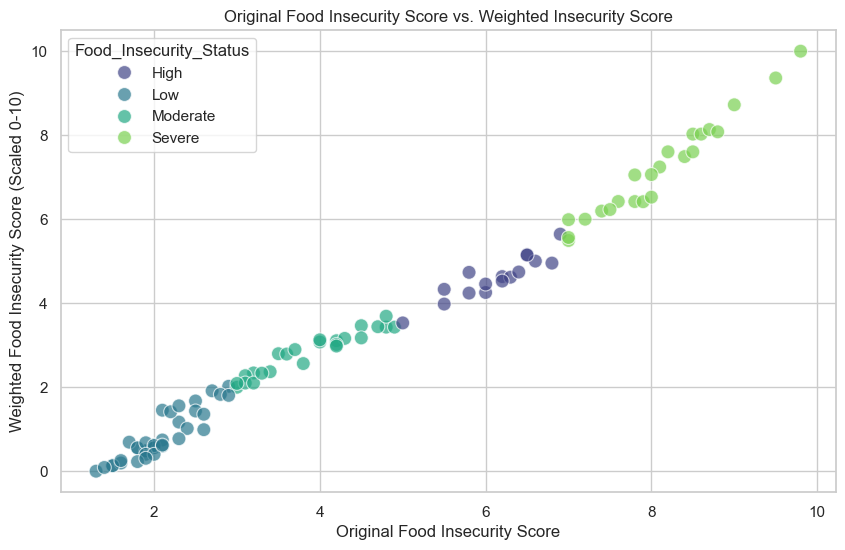

In [69]:
# Visualize Weighted Score vs. Original Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Food_Insecurity_Score', y='Weighted_Insecurity_Score_Scaled', hue='Food_Insecurity_Status', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Original Food Insecurity Score vs. Weighted Insecurity Score')
plt.xlabel('Original Food Insecurity Score')
plt.ylabel('Weighted Food Insecurity Score (Scaled 0-10)')
plt.grid(True)
plt.show()



9- Visualization of Household Income by Food Insecurity Status:

In [73]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))


<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

Purpose:

This code block aims to visually explore the relationship between Household_Income_USD and Food_Insecurity_Status using a bar plot.

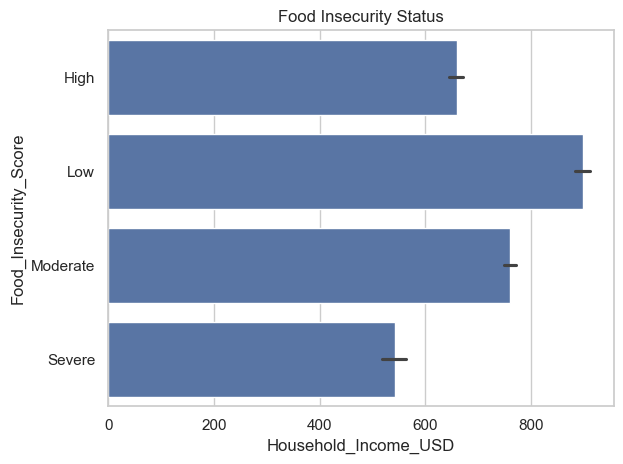

In [74]:
# Create boxplots
sns.barplot(x='Household_Income_USD', y="Food_Insecurity_Status", data=df)
plt.title('Food Insecurity Status')
plt.ylabel("Food_Insecurity_Score")

plt.tight_layout()
plt.show()

Conclusion:

Above BarPlot is Showing a clear inverse relationship between household income and the level of food insecurity.

9- Feature Selection for Numerical Analysis:

purpose :

A. To Isolate Numerical Features: It selects a specific subset of columns from the original df DataFrame that contain numerical data. This is often done to prepare for statistical analysis, correlation calculations, or modeling that only operates on numerical inputs.

B. Prepare for Quantitative Analysis: By creating numeric_df, We're creating a clean DataFrame containing only the quantitative variables relevant for further numerical operations.

C. Simplify Data Operations: Working with a smaller DataFrame that only contains the necessary numerical columns can improve performance.


In [75]:
df.columns

Index(['Region_ID', 'Date', 'Avg_Temperature_C', 'Rainfall_mm',
       'Drought_Index', 'Flood_Occurrence', 'Crop_Yield_Hectare',
       'Market_Price_Staple_Food', 'Household_Income_USD', 'Conflict_Index',
       'Displacement_Count', 'Food_Insecurity_Score', 'Food_Insecurity_Status',
       'Avg_Temperature_C_Normalized', 'Rainfall_mm_Normalized',
       'Drought_Index_Normalized', 'Flood_Occurrence_Normalized',
       'Crop_Yield_Hectare_Normalized', 'Market_Price_Staple_Food_Normalized',
       'Household_Income_USD_Normalized', 'Conflict_Index_Normalized',
       'Displacement_Count_Normalized', 'Weighted_Insecurity_Score',
       'Weighted_Insecurity_Score_Scaled'],
      dtype='object')

In [76]:
numeric_df = df[["Avg_Temperature_C","Rainfall_mm","Drought_Index","Crop_Yield_Hectare",
                   "Market_Price_Staple_Food","Household_Income_USD","Conflict_Index","Displacement_Count",
                               "Food_Insecurity_Score"]]

10- Correlation Matrix Visualization:

Purpose:
This code block generates a heatmap to visualize the correlation matrix of the numerical features in our newly created numeric_df DataFrame.

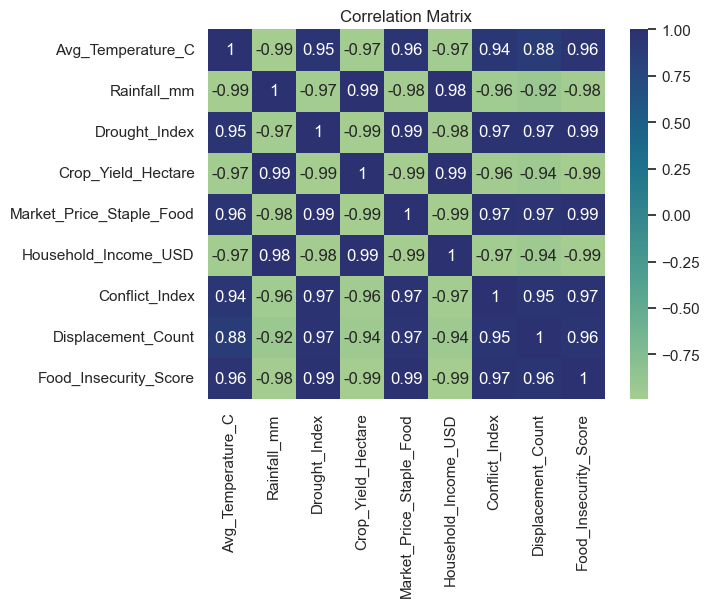

In [40]:
sns.heatmap(numeric_df.corr(), annot=True, cmap="crest")
plt.title('Correlation Matrix')
plt.show()

Conclusion:

The entire block is essential for understanding the relationships between different numerical variables in our dataset. By visualizing the correlation matrix, We can quickly identify:
+1: Perfect positive correlation (as one variable increases, the other increases proportionally).
-1: Perfect negative correlation (as one variable increases, the other decreases proportionally).
0: No linear correlation.

A. strong positive correlations between Food_Insecurity_Score and factors that exacerbate food insecurity, such as Drought_Index, Conflict_Index, Displacement_Count, and Market_Price_Staple_Food. A high positive correlation indicates that as these factors increase, the food insecurity score also tends to increase.

B. strong negative correlations between Food_Insecurity_Score and factors that improve food security, such as Crop_Yield_Hectare and Household_Income_USD. A strong negative correlation means that as crop yields and household income increase, the food insecurity score tends to decrease.


Purpose:

_Training a classification model. 
_Encoding Target Labels. 
_It learns the unique categories present in the Food_Insecurity_Status column (e.g., "Food Secure", "Moderately Insecure", "Severely Insecure").
_It then converts these text categories into numerical labels (e.g., "Food Secure" might become 0, "Moderately Insecure" might become 1, "Severely Insecure" might become 2).

Note: Machine learning algorithms primarily work with numerical data. LabelEncoder is used because our Food_Insecurity_Status column is categorical (text-based). This conversion is necessary for the model to process the target variable.

In [41]:
# Encode target labels:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

label_encoder = LabelEncoder()
df['Food_Insecurity_Status'] = label_encoder.fit_transform(df['Food_Insecurity_Status'])

# Select features and target
features = ['Avg_Temperature_C', 'Rainfall_mm', 'Drought_Index', 'Flood_Occurrence',
            'Crop_Yield_Hectare', 'Market_Price_Staple_Food', 'Household_Income_USD',
            'Conflict_Index', 'Displacement_Count']

target = 'Food_Insecurity_Status'

X = df[features]
y = df[target]

In [42]:
df['Food_Insecurity_Status'].unique()

array([1, 2, 0, 3])

In [43]:
df.head()

,Region_ID,Date,Avg_Temperature_C,Rainfall_mm,Drought_Index,Flood_Occurrence,Crop_Yield_Hectare,Market_Price_Staple_Food,Household_Income_USD,Conflict_Index,...,Food_Insecurity_Status,Avg_Temperature_C_Normalized,Rainfall_mm_Normalized,Drought_Index_Normalized,Flood_Occurrence_Normalized,Crop_Yield_Hectare_Normalized,Market_Price_Staple_Food_Normalized,Household_Income_USD_Normalized,Conflict_Index_Normalized,Displacement_Count_Normalized
0,R001,15-01-2023,25.5,120.5,0.2,0,3.2,150,850,0.1,...,1,0.291667,0.745161,0.111111,0,0.774194,0.135135,0.767857,0.125,0.055556
1,R002,15-01-2023,28.1,90.2,0.5,0,2.8,180,780,0.2,...,2,0.508333,0.549677,0.277778,0,0.645161,0.297297,0.642857,0.250,0.138889
2,R003,15-01-2023,22.0,150.0,0.1,0,3.5,140,920,0.0,...,1,0.000000,0.935484,0.055556,0,0.870968,0.081081,0.892857,0.000,0.027778
3,R004,15-01-2023,30.2,50.1,0.8,0,2.0,220,650,0.3,...,0,0.683333,0.290968,0.444444,0,0.387097,0.513514,0.410714,0.375,0.277778
4,R005,15-01-2023,26.8,110.3,0.3,0,3.0,165,800,0.1,...,1,0.400000,0.679355,0.166667,0,0.709677,0.216216,0.678571,0.125,0.083333


Data Splitting (Training and Testing Sets)

X: This refers to our independent variables (features) DataFrame.

y: This refers to our dependent variable (target) Series.

test_size=0.2: This argument specifies that, 20% of our data will be reserved for the testing set, and the remaining 80% will be used for the training set. This is a common split ratio.

In [44]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Purpose:

This code block initiates and trains a Logistic Regression model, which is a common algorithm used for classification tasks.

This step is where the machine learning model actually learns from our prepared data. By calling fit(), the Logistic Regression algorithm finds the optimal parameters that will allow it to make predictions on new, unseen data, effectively creating a model that can classify regions based on their food security attributes.

In [45]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="multinomial")
log_reg.fit(X_train,y_train) # Fitting the model

LogisticRegression(multi_class='multinomial')

This code block evaluates the performance of the trained Logistic Regression model by calculating and printing its accuracy score on both the training and testing datasets.


In [78]:
y_pred = log_reg.predict(X_test) # Predicting the results

In [79]:
#logistic regression Accuracy
print("Trainig Score: ",(log_reg.score(X_train, y_train))*100,"%")
print("Testing Score: ",(log_reg.score(X_test, y_test))*100,"%")

Trainig Score:  98.75 %
Testing Score:  90.0 %


from sklearn.metrics we have import accuracy_score, precision_score, recall_score, f1_score:

This line imports several key classification metrics from scikit-learn's metrics module. These metrics provide a more nuanced understanding of model performance than accuracy alone, especially in multi-class or imbalanced datasets.



In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

a. Calculates the overall proportion of correctly predicted instances.

b. Calculates the error rate, which is simply the proportion of incorrectly predicted instances.


In [81]:
def evaluate_logistic_regression(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    error = 1 - accuracy
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Error Rate: {error:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Call the function with correct predictions
evaluate_logistic_regression(y_test, y_pred)

Accuracy: 0.9000
Error Rate: 0.1000
Precision: 0.9187
Recall: 0.9000
F1 Score: 0.8994


Counclusion :

1. If all metrics are high (e.g., >80% or 0.80): The model is performing very well, demonstrating strong predictive capabilities across all food insecurity categories.

2. If Accuracy is high but Recall for a specific class is low: The model might be struggling to correctly identify instances of that particular (possibly minority) food insecurity status, even if its overall correct predictions are high.

3. If Precision is low for a class but Recall is high: The model might be over-predicting that class, catching most true positives but also including many false positives.

Purpose:

This code block initializes and trains a Random Forest Classifier model, which is another popular and powerful algorithm for classification tasks, often outperforming Logistic Regression in many scenarios due to its ensemble nature.

In [49]:
# Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
y_pred = random_forest.predict(X_test) # Predicting the results

This step is fundamental for evaluating your model. Once the predictions (y_pred) are generated, they can be compared against the actual true labels (y_test) to calculate various performance metrics (like accuracy, precision, recall, F1-score)

This method calculates the accuracy of the Random Forest model on the training data. Accuracy is the proportion of correctly predicted labels.



In [85]:
#logistic regression Accuracy
print("Trainig Score: ",(random_forest.score(X_train, y_train))*100,"%")
print("Testing Score: ",(random_forest.score(X_test, y_test))*100,"%")

Trainig Score:  100.0 %
Testing Score:  95.0 %


conclusion:

The comparison of training and testing scores for the Random Forest model indicates its ability to classify food insecurity, with insights into potential overfitting or generalization performance.

In This code block i have reused the evaluate_logistic_regression function to provide a detailed and comprehensive evaluation of the Random Forest model's performance on the test set.


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_random_forest(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    error = 1 - accuracy
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Error Rate: {error:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Call the function with correct predictions
evaluate_logistic_regression(y_test, y_pred)

Accuracy: 0.9500
Error Rate: 0.0500
Precision: 0.9625
Recall: 0.9500
F1 Score: 0.9500


Conclusion:

This comprehensive evaluation of the Random Forest model tells us how well it performs. High scores across accuracy, precision, recall, and F1 indicate the model is good at identifying food insecurity. These metrics are crucial for ensuring the model reliably predicts which regions are most vulnerable. Ultimately, this helps us trust the model's ability to inform efforts against food insecurity.




In [89]:
from sklearn.neighbors import KNeighborsClassifier

Purpose: 

Scaling is highly important for distance based algorithms like KNN. Without scaling, features with larger numerical ranges (e.g., Household_Income_USD) would dominate the distance calculations, making features with smaller ranges (e.g., Drought_Index) almost irrelevant, even if they are very important.

In [87]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)




# KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Purpose: 

This line uses the trained knn model to make predictions on the X_test dataset. For each instance in X_test, the KNN model identifies its n_neighbors in the training data and assigns the most frequent class among those neighbors as its prediction.

Output: 

The y_pred variable will store an array (or Series) of the predicted numerical labels for the Food_Insecurity_Status corresponding to the X_test instances.

In [88]:
# Predict and evaluate
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

        High       1.00      0.75      0.86         4
         Low       0.88      1.00      0.93         7
    Moderate       1.00      0.83      0.91         6
      Severe       0.75      1.00      0.86         3

    accuracy                           0.90        20
   macro avg       0.91      0.90      0.89        20
weighted avg       0.92      0.90      0.90        20



Conclusion:

Overall Performance: The report shows how accurate the KNN model is at guessing the food insecurity status.

Accuracy for Each Type: It tells us if the model is better at finding Food Secure regions, v/s Severely Insecure ones.

Avoiding Wrong Guesses (Precision): It indicates if, when the model says a region is, for example, Severely Insecure, it is usually right.

Catching All Cases (Recall): It shows if the model successfully identifies most of the regions that actually are in a certain food insecurity category.

Balanced View (F1-Score): This number helps us understand if the model is good at both avoiding wrong guesses and catching all the actual cases for each type of food insecurity.

* If you prioritize understanding and speed for a relatively simple problem, Logistic Regression is often a good start.

* If our main goal is the highest possible predictive accuracy, especially for complex relationships, Random Forest is usually the go-to choice.

* KNN is a viable option if our data is well scaled, not extremely high dimensional, and you appreciate its simple, local approach, but it often needs careful tuning.

For our food security project, given the complexity of the factors involved, Random Forest would generally be considered the "better" model for achieving high predictive performance, assuming its accuracy on the test set is superior to the others.


This code defines a function that takes user input, uses a trained model to make a prediction, and displays the result.

In [106]:
def new_data(model, label_encoder):
    print("Enter values:")
    inputs = [
        float(input("Temp (°C): ")),
        float(input("Rainfall (mm): ")),
        float(input("Drought Index: ")),
        int(input("Flood (0/1): ")),
        float(input("Crop Yield (Ha): ")),
        float(input("Market Price (USD): ")),
        float(input("Household Income (USD): ")),
        float(input("Conflict Index: ")),
        int(input("Displacement Count: "))
    ]

    input_data = pd.DataFrame([inputs], columns=[
        'Avg_Temperature_C', 'Rainfall_mm', 'Drought_Index', 'Flood_Occurrence',
        'Crop_Yield_Hectare', 'Market_Price_Staple_Food', 'Household_Income_USD',
        'Conflict_Index', 'Displacement_Count'
    ])

   #label encoding used to take numerical predictions and converts it back to its original categorical string representation.
    predicted_label = label_encoder.inverse_transform(model.predict(input_data))[0]
    print(f"Predicted Status: {predicted_label}")

In [107]:
new_data (log_reg, label_encoder)

Enter values:


Temp (°C):  24
Rainfall (mm):  400
Drought Index:  1
Flood (0/1):  0
Crop Yield (Ha):  50
Market Price (USD):  1
Household Income (USD):  400
Conflict Index:  1
Displacement Count:  500


Predicted Status: Severe


In [108]:
new_data (random_forest, label_encoder)

Enter values:


Temp (°C):  24
Rainfall (mm):  400
Drought Index:  1
Flood (0/1):  0
Crop Yield (Ha):  50
Market Price (USD):  1
Household Income (USD):  400
Conflict Index:  1
Displacement Count:  500


Predicted Status: Low


In [109]:
new_data (knn, label_encoder)


Enter values:


Temp (°C):  24
Rainfall (mm):  400
Drought Index:  1
Flood (0/1):  0
Crop Yield (Ha):  50
Market Price (USD):  1
Household Income (USD):  400
Conflict Index:  1
Displacement Count:  500


Predicted Status: Severe


In [59]:
new_data (knn, label_encoder)

Enter the following values:


Average Temperature (°C):  3
Rainfall (mm):  3
Drought Index:  3
Flood Occurrence (0 or 1):  3
Crop Yield per Hectare:  3
Market Price of Staple Food (USD):  3
Household Income (USD):  3
Conflict Index:  3
Displacement Count:  3



🔍 Predicted Food Insecurity Status: Severe


In [ ]:
new_data (log_reg, label_encoder)

In [ ]:
new_data (knn, label_encoder)

In [ ]:
#Conclusion
#random forest gives us the overfit model because it considers individual feature 
#but KNN and logistic regression aare the balanced models so i will consider the results of knn and random forest 

In [ ]:
new_data (log_reg, label_encoder)

In [ ]:
new_data (log_reg, label_encoder)